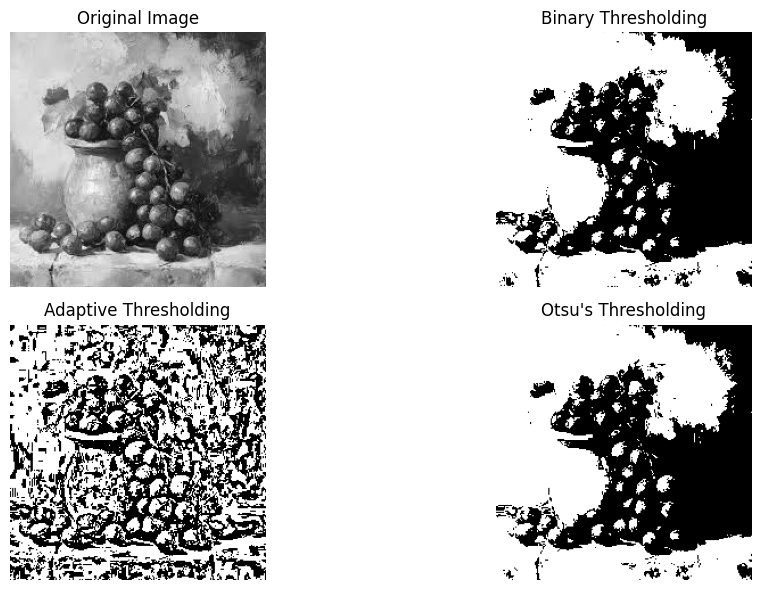

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import sys

# Load the image in grayscale
image = cv2.imread('input/download.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Binary Thresholding
_, binary_threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 2. Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                           cv2.THRESH_BINARY, 11, 2)

# 3. Otsu's Thresholding
_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# b) Display the original and segmented images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Binary Thresholding
plt.subplot(2, 2, 2)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

# Adaptive Thresholding
plt.subplot(2, 2, 3)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(2, 2, 4)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu\'s Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


### Discussion of Thresholding Methods

- **Binary Thresholding**  
  Binary thresholding works well for images with a clear contrast between foreground and background. However, it struggles with varying lighting conditions and uneven backgrounds, making it less effective for complex images.

- **Adaptive Thresholding**  
  Adaptive thresholding adjusts the threshold dynamically based on local pixel values. This makes it more robust for images with uneven lighting or varying background intensity, providing better segmentation in such cases.

- **Otsu’s Thresholding**  
  Otsu’s thresholding calculates an optimal global threshold by minimizing intra-class variance. It is highly effective when the image has a bimodal histogram (two peaks) and performs well for segmenting objects with clear boundaries in a consistent background.

**Conclusion:**  
Otsu’s Thresholding is ideal for images with distinct object-background separation due to its automated approach, but Adaptive Thresholding excels in cases of uneven lighting or complex backgrounds.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(image_path, canny_threshold1=50, canny_threshold2=150, hough_threshold=100):
    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Canny(gray, canny_threshold1, canny_threshold2)
    
    # Detect lines using Hough Transform
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=hough_threshold)
    
    # Create a copy of the original image to draw lines
    output = original.copy()
    
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines
    
    return original, output


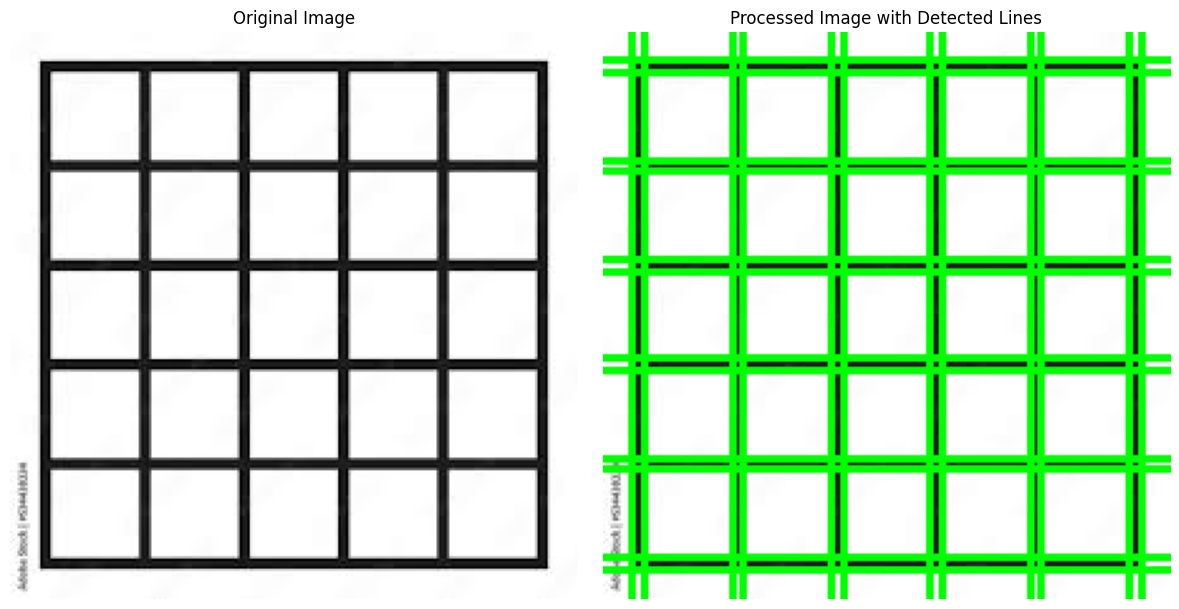

In [7]:
# Path to the input image
image_path = 'input/grid.jpeg'

# Detect lines and get processed images
original, processed = detect_lines(image_path)

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed image with lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Detected Lines')
plt.axis('off')

plt.tight_layout()
plt.show()

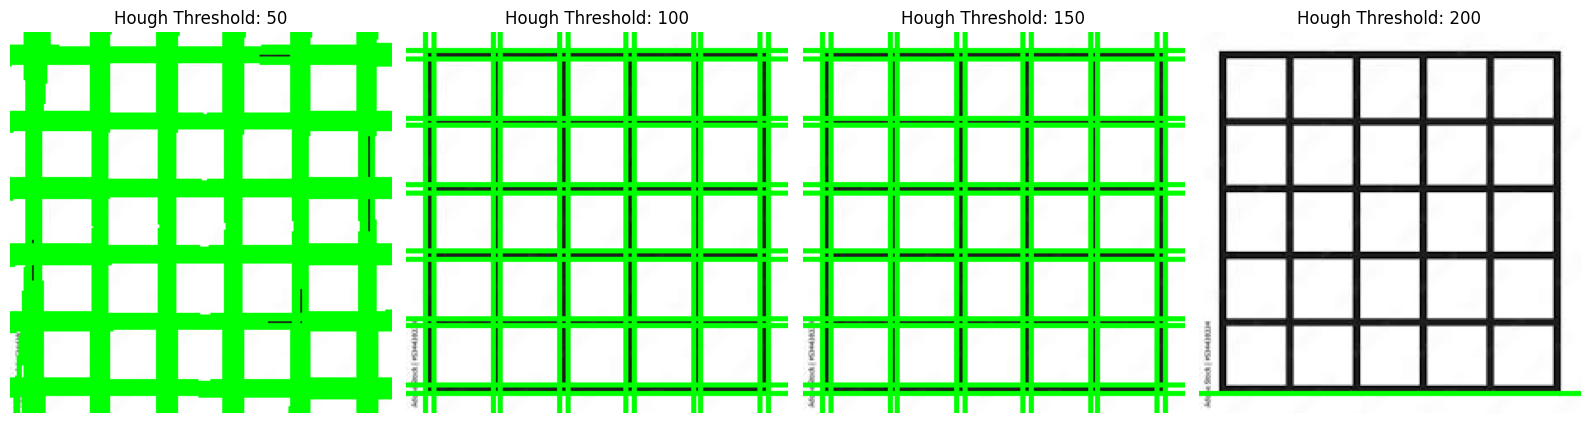

In [8]:
# Define different Hough Transform thresholds to test
hough_thresholds = [50, 100, 150, 200]

# Initialize a figure for displaying results
plt.figure(figsize=(16, 8))

for i, threshold in enumerate(hough_thresholds, start=1):
    # Detect lines with the current threshold
    _, processed = detect_lines(image_path, hough_threshold=threshold)
    
    # Display the processed image
    plt.subplot(1, 4, i)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(f'Hough Threshold: {threshold}')
    plt.axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(image_path, dp=1.2, min_dist=20, param1=50, param2=30, min_radius=0, max_radius=0):
    
    # Load the image in color
    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to smooth the image
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=dp, minDist=min_dist,
                               param1=param1, param2=param2,
                               minRadius=min_radius, maxRadius=max_radius)
    
    # Create a copy of the original image to draw circles
    output = original.copy()
    
    if circles is not None:
        circles = np.uint16(np.around(circles))  # Round circle parameters
        for circle in circles[0, :]:
            # Draw the outer circle
            cv2.circle(output, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(output, (circle[0], circle[1]), 2, (0, 0, 255), 3)
    
    return original, output


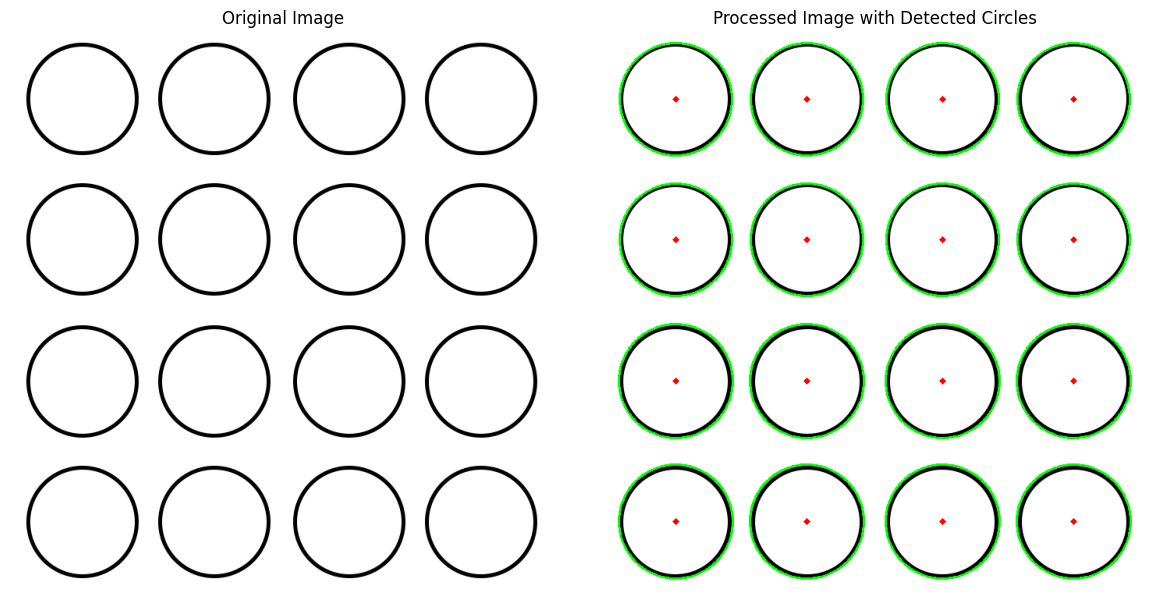

In [2]:
# Path to the input image
image_path = 'input/circles.png'

# Detect circles in the image
original, processed = detect_circles(image_path, dp=1.2, min_dist=30, param1=50, param2= 40, min_radius=10, max_radius=100)

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed image with detected circles
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()


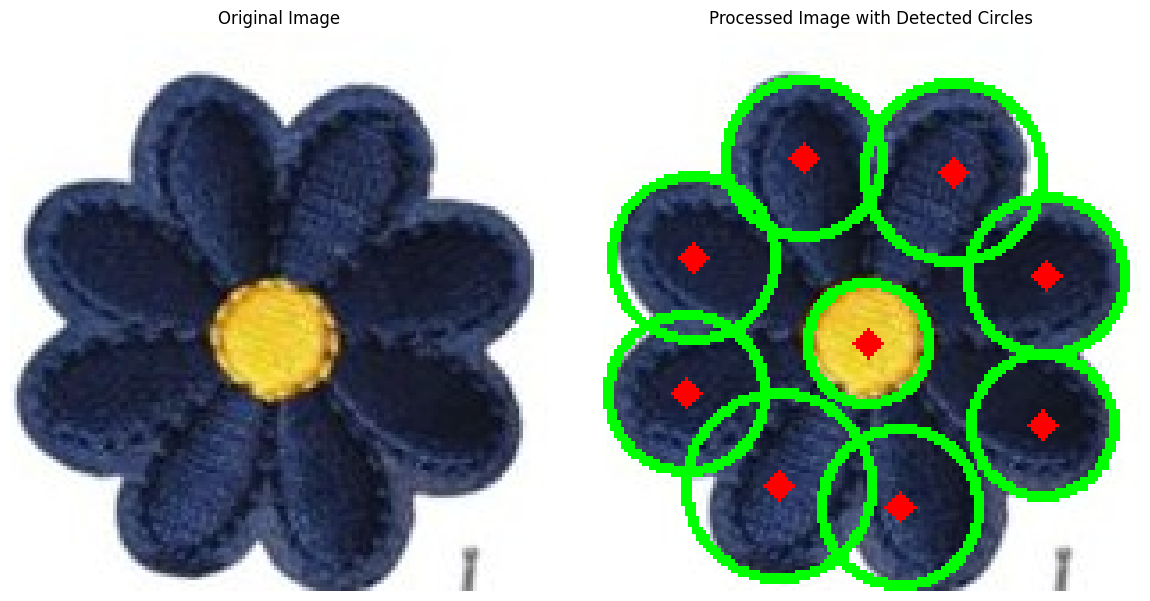

In [13]:
# Path to the input image
image_path = 'input/Circle.jpeg'

# Detect circles in the image
original, processed = detect_circles(image_path, dp=1.2, min_dist=30, param1=50, param2= 35, min_radius=10, max_radius=100)

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed image with detected circles
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()


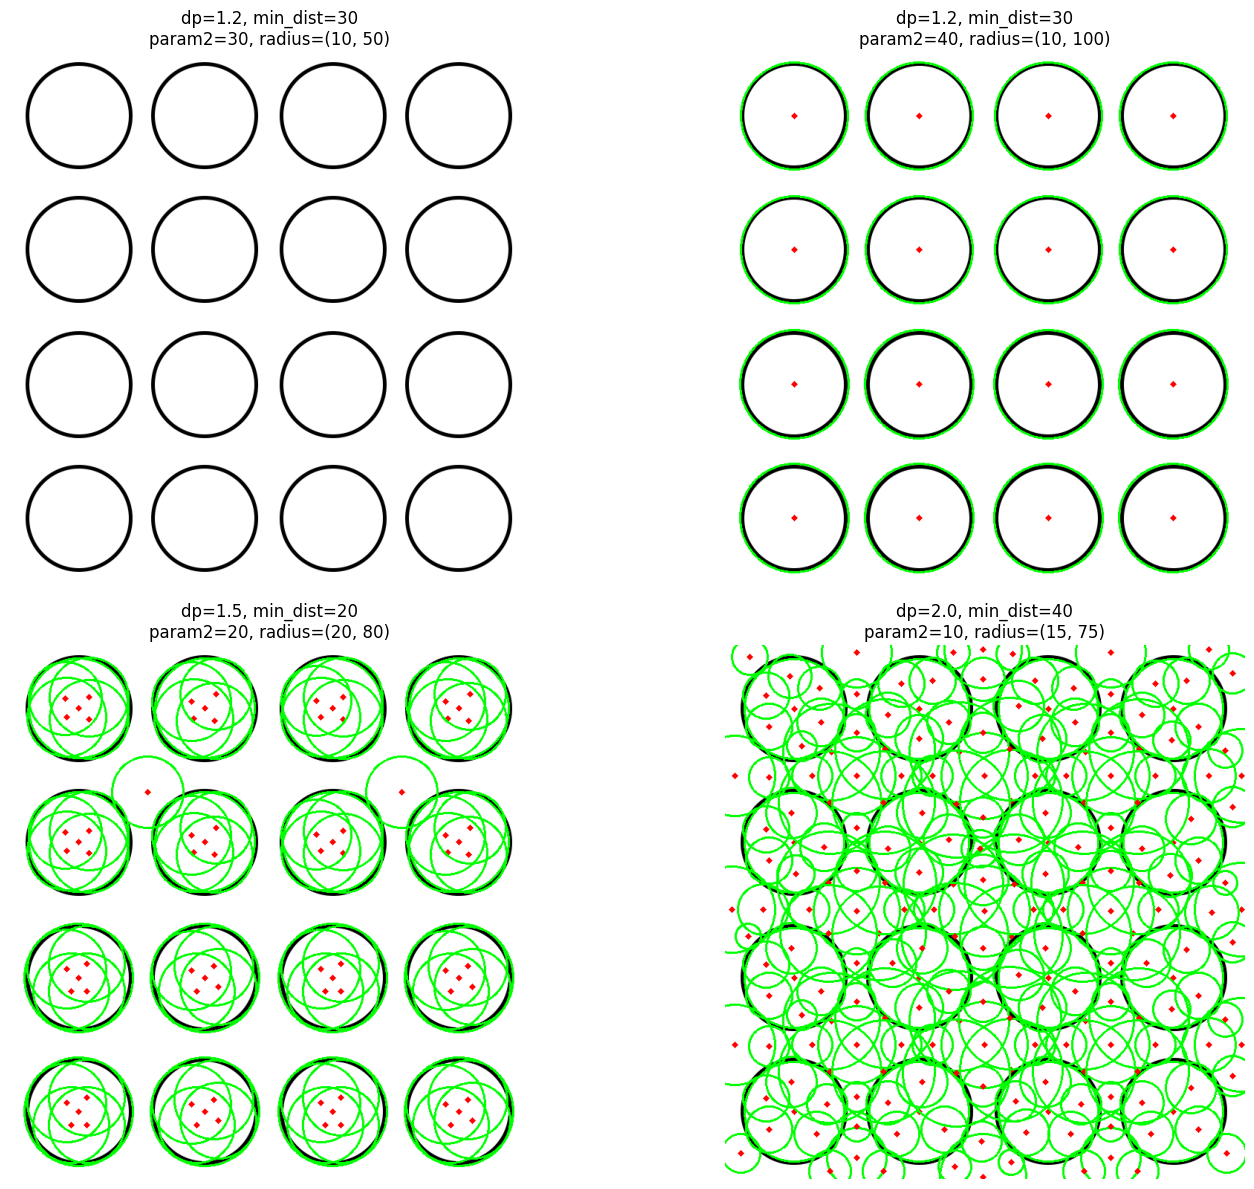

In [16]:
image_path = 'input/circles.png'
tests = [
    {"dp": 1.2, "min_dist": 30, "param1": 50, "param2": 30, "min_radius": 10, "max_radius": 50},
    {"dp": 1.2, "min_dist": 30, "param1": 50, "param2": 40, "min_radius": 10, "max_radius": 100},
    {"dp": 1.5, "min_dist": 20, "param1": 100, "param2": 20, "min_radius": 20, "max_radius": 80},
    {"dp": 2.0, "min_dist": 40, "param1": 200, "param2": 10, "min_radius": 15, "max_radius": 75},
]

# Plot results for each parameter set
plt.figure(figsize=(16, 12))

for i, params in enumerate(tests, start=1):
    # Detect circles with the current parameter set
    _, processed = detect_circles(image_path, **params)
    
    # Display processed image
    plt.subplot(2, 2, i)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(
        f"dp={params['dp']}, min_dist={params['min_dist']}\n"
        f"param2={params['param2']}, radius=({params['min_radius']}, {params['max_radius']})"
    )
    plt.axis('off')

plt.tight_layout()
plt.show()


In [42]:
def detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.1, dot_size=5):
    
    original = cv2.imread(image_path)
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)  
    
    
    harris_response = cv2.cornerHarris(gray, block_size, ksize, k)
    
    
    harris_response = cv2.dilate(harris_response, None)
    
    
    output = original.copy()
    
    
    corners = np.argwhere(harris_response > threshold * harris_response.max())
    for corner in corners:
        y, x = corner  
        cv2.circle(output, (x, y), dot_size, (200, 100, 100), -1)  
    
    return original, output


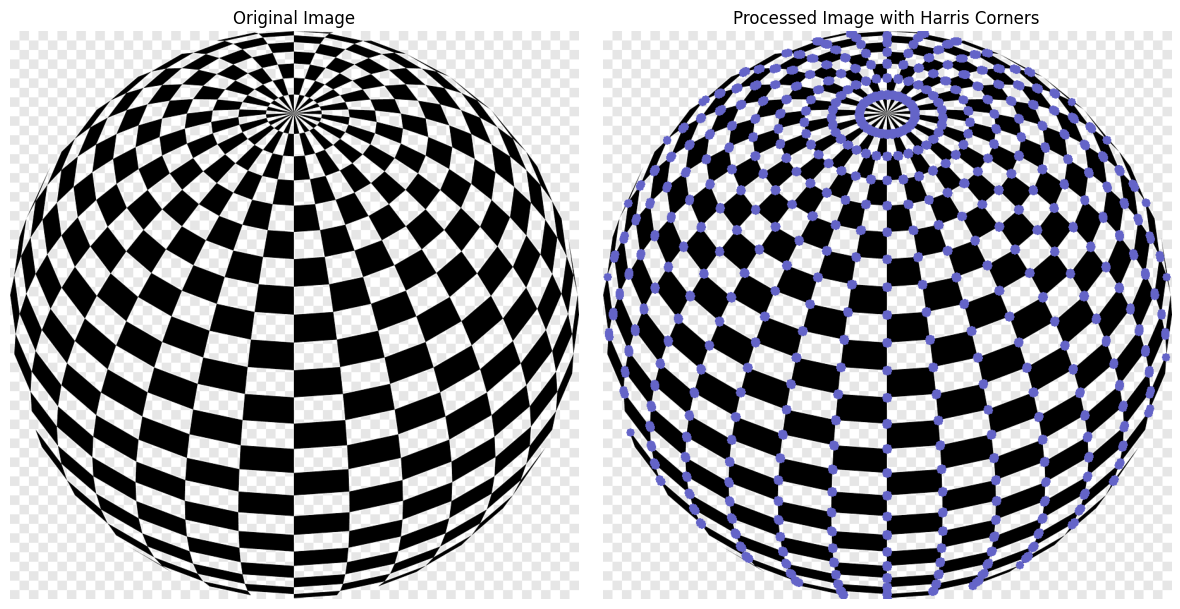

In [43]:
# Path to the input image
image_path = 'input/corners.png'

# Detect corners in the image
original, processed = detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.1)

# Display the original and processed images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed image with marked corners
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Harris Corners')
plt.axis('off')

plt.tight_layout()
plt.show()


k_values: [0.16    0.17125 0.1825  0.19375 0.205   0.21625 0.2275  0.23875 0.25   ]


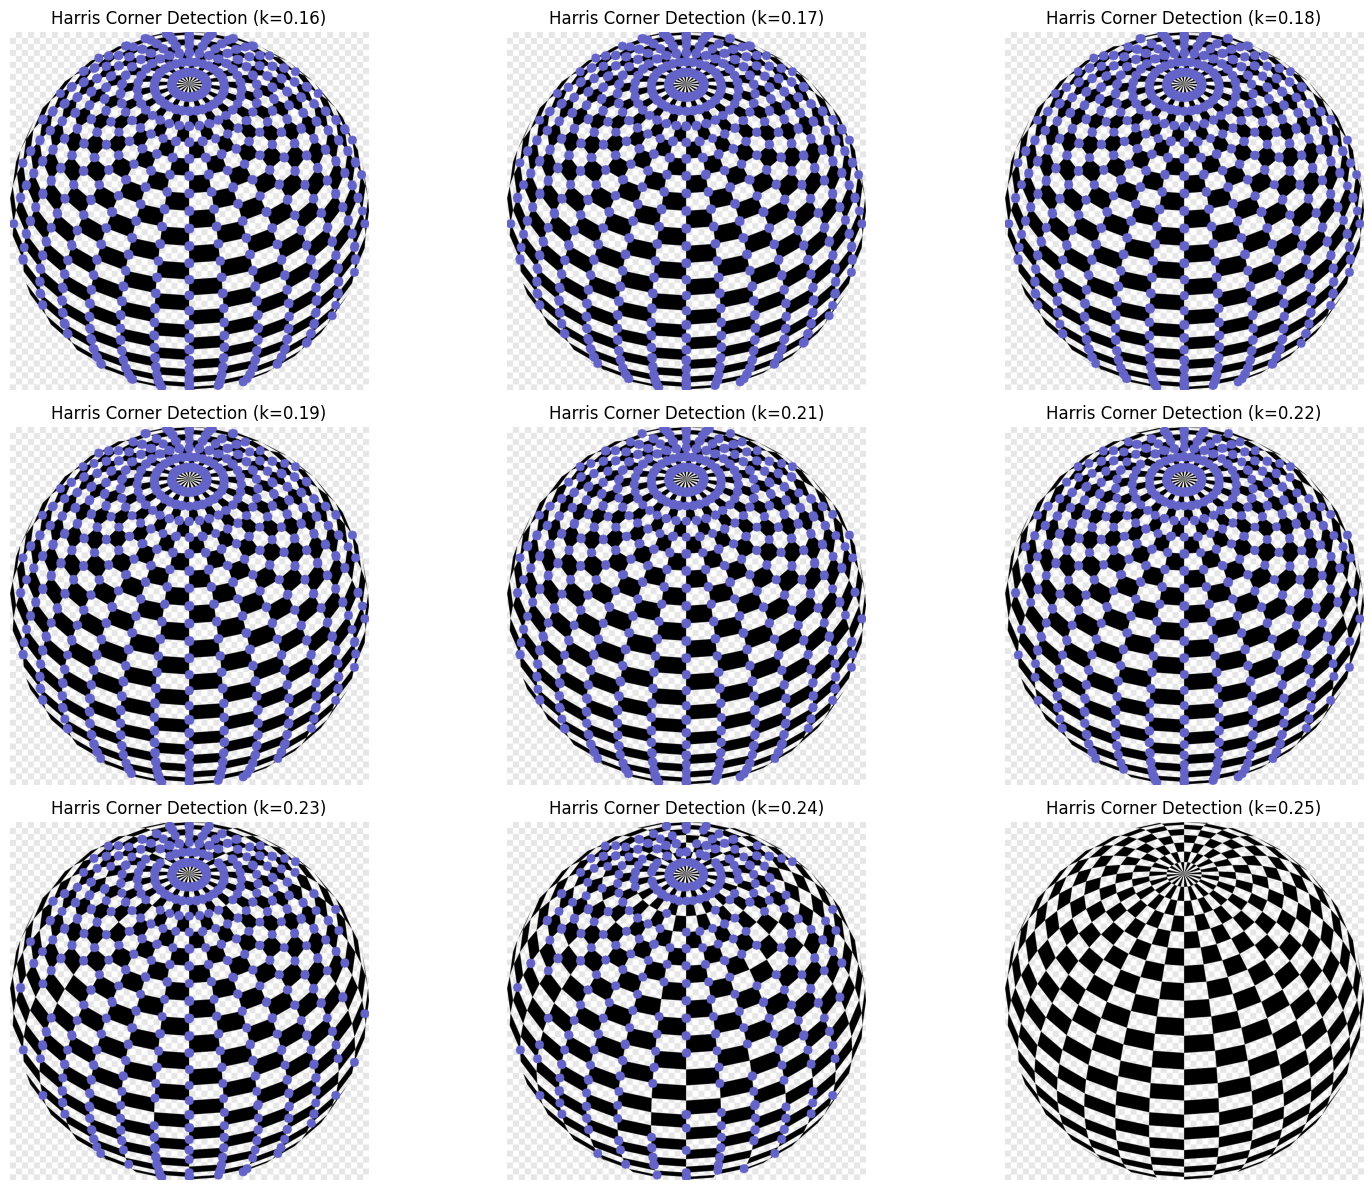

In [50]:
import numpy as np

# Generate 9 evenly spaced values for k between 0 and 1
k_values = np.linspace(0.16, 0.25, 9)

# Print the generated values for reference
print("k_values:", k_values)

# Plot results for each k value
plt.figure(figsize=(16, 12))

for i, k in enumerate(k_values, start=1):
    # Detect corners with the current k value
    _, processed = detect_harris_corners(image_path, block_size=2, ksize=3, k=k, threshold=0.1, dot_size=10)
    
    # Display processed image
    plt.subplot(3, 3, i)  # 3 rows, 3 columns for 9 images
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(f'Harris Corner Detection (k={k:.2f})')
    plt.axis('off')

plt.tight_layout()
plt.show()


The Hough Transform for detecting lines and circles differs in parameter space and complexity. For line detection, the transform maps image points to a 2D parameter space, typically defined by the line equation `ρ = x cos(θ) + y sin(θ)`, where `ρ` is the distance from the origin and `θ` is the angle. This makes line detection computationally efficient as only two parameters need to be optimized.

For circle detection, the parameter space expands to three dimensions: the circle’s center coordinates `(a, b)` and radius `r`. Detecting circles involves iterating over potential center points and radii, significantly increasing computational complexity compared to lines.

The difference arises because lines have infinite extent (defined by slope and intercept), while circles are constrained by fixed centers and radii, requiring more exhaustive parameter space searches, especially for varying circle sizes.
